# NAIVE BAYES AND TEXT MINING

In [112]:
!pip install spacy


In [113]:
!pip install nltk

In [114]:
! python -m spacy download en_core_web_md

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 MB 19.0 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [115]:
!pip install wordcloud

In [116]:
#Importing the needfull Libraries
import numpy as np #linear algebra
import pandas as pd #data processing
import string #to do special operations on strings
import spacy #language module

from matplotlib.pyplot import imread
from matplotlib import pyplot as plt# to plot the data
from wordcloud import WordCloud # to generate a plot to show the words with most freuency
%matplotlib inline

In [117]:
data=pd.read_csv("/content/drive/MyDrive/Assignments/Naive bayes and text mining/blogs.csv")
data.head()

,Data,Labels
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,alt.atheism


In [118]:
data.shape

(2000, 2)

In [119]:
# Download NLTK data files (stopwords and punkt)
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

### Data Pre-Processing

In [120]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize #tokenization of the sentence or phrases

In [121]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS # importing the stop words module to remove the stop words in the text data
from sklearn.feature_extraction.text import TfidfVectorizer #we are using TF-IDF vectorization for preprocessing

In [122]:
# Data Preprocessing
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Tokenize the text
    tokens = word_tokenize(text)
    # Remove stopwords
    tokens = [word for word in tokens if word not in ENGLISH_STOP_WORDS] # checks every token and sees if their is any match with the stop words and if any match then the word is removed
    return ' '.join(tokens)

In [123]:
# Apply preprocessing
data['cleaned_text'] = data['Data'].apply(preprocess_text)

Given the nature of your dataset (blog posts, which can contain nuanced language and varying contexts), lemmatization is likely a better choice than stemming.

In [124]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
import nltk

# Download required NLTK data
nltk.download('wordnet')

# Initialize the lemmatizer
lemmatizer = WordNetLemmatizer()

def lemmatize_text(text):
    # Tokenize and lemmatize
    return ' '.join(lemmatizer.lemmatize(word) for word in word_tokenize(text))

# Apply lemmatization to the cleaned text
data['lemmatized_text'] = data['cleaned_text'].apply(lemmatize_text)


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


#### Feature Extraction

In [125]:
# Feature Extraction using TF-IDF
tfidf = TfidfVectorizer(max_features=1000) # giving the max features as 1000 , to maintain the dimensionality and avoidng high dimensionality
X = tfidf.fit_transform(data['lemmatized_text'])
y = data['Labels']

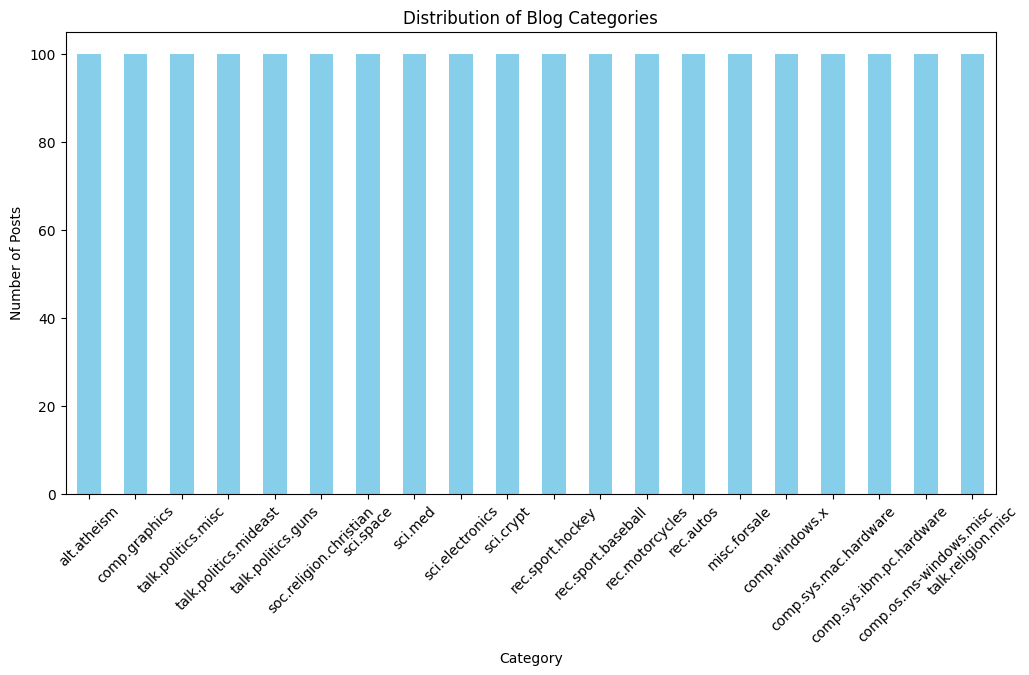

In [126]:
# Plot the distribution of categories
category_counts = data['Labels'].value_counts()
plt.figure(figsize=(12, 6))
category_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Blog Categories')
plt.xlabel('Category')
plt.ylabel('Number of Posts')
plt.xticks(rotation=45)
plt.show()

### Naive bayes Model Building

In [127]:
from sklearn.model_selection import train_test_split # to split data into train and test datasets
from sklearn.naive_bayes import MultinomialNB # for naive bayes classification
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report # evaluation metrics
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score # to check the cross validation score

In [128]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [129]:
# Naive Bayes Model
model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

In [130]:
# Predictions
y_pred = model.predict(X_test)

#### Evaluation Metrics

In [131]:
# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_pred, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred, average='weighted'))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7525
Precision: 0.7596205595933857
Recall: 0.7525
F1 Score: 0.7454197872771249

Classification Report:
                           precision    recall  f1-score   support

             alt.atheism       0.54      0.78      0.64        18
           comp.graphics       0.65      0.83      0.73        18
 comp.os.ms-windows.misc       0.77      0.77      0.77        22
comp.sys.ibm.pc.hardware       0.71      0.60      0.65        25
   comp.sys.mac.hardware       0.70      0.76      0.73        21
          comp.windows.x       0.77      0.80      0.78        25
            misc.forsale       0.79      0.61      0.69        18
               rec.autos       0.90      1.00      0.95        18
         rec.motorcycles       0.64      0.88      0.74        16
      rec.sport.baseball       0.81      0.94      0.87        18
        rec.sport.hockey       0.83      1.00      0.91        15
               sci.crypt       0.85      0.89      0.87        19
         sci.electronics 

### Sentiment Analysis

In [132]:
# Sentiment Analysis
from textblob import TextBlob

In [133]:
def get_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0: #deciding the sentiment of the term with the values of polarity
        return 'positive'
    elif analysis.sentiment.polarity == 0:
        return 'neutral'
    else:
        return 'negative'

In [134]:
# Apply sentiment analysis
data['sentiment'] = data['lemmatized_text'].apply(get_sentiment)

In [135]:
# Sentiment Distribution
sentiment_counts = data['sentiment'].value_counts()
print("\nSentiment Distribution:\n", sentiment_counts)



Sentiment Distribution:
 sentiment
positive    1387
negative     611
neutral        2
Name: count, dtype: int64


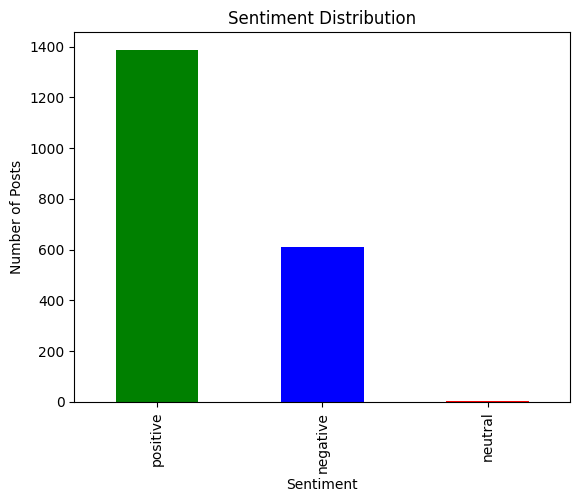

In [136]:
# Plot sentiment distribution
sentiment_counts.plot(kind='bar', color=['green', 'blue', 'red'])
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Number of Posts')
plt.show()

In [137]:
# Sentiment distribution across categories
sentiment_category = data.groupby('Labels')['sentiment'].value_counts(normalize=True).unstack()
print("\nSentiment Distribution Across Categories:\n", sentiment_category)


Sentiment Distribution Across Categories:
 sentiment                 negative  neutral  positive
Labels                                               
alt.atheism                   0.40      NaN      0.60
comp.graphics                 0.32      NaN      0.68
comp.os.ms-windows.misc       0.24      NaN      0.76
comp.sys.ibm.pc.hardware      0.22      NaN      0.78
comp.sys.mac.hardware         0.25      NaN      0.75
comp.windows.x                0.25     0.01      0.74
misc.forsale                  0.24      NaN      0.76
rec.autos                     0.26      NaN      0.74
rec.motorcycles               0.29      NaN      0.71
rec.sport.baseball            0.41     0.01      0.58
rec.sport.hockey              0.47      NaN      0.53
sci.crypt                     0.23      NaN      0.77
sci.electronics               0.24      NaN      0.76
sci.med                       0.35      NaN      0.65
sci.space                     0.31      NaN      0.69
soc.religion.christian        0.29    

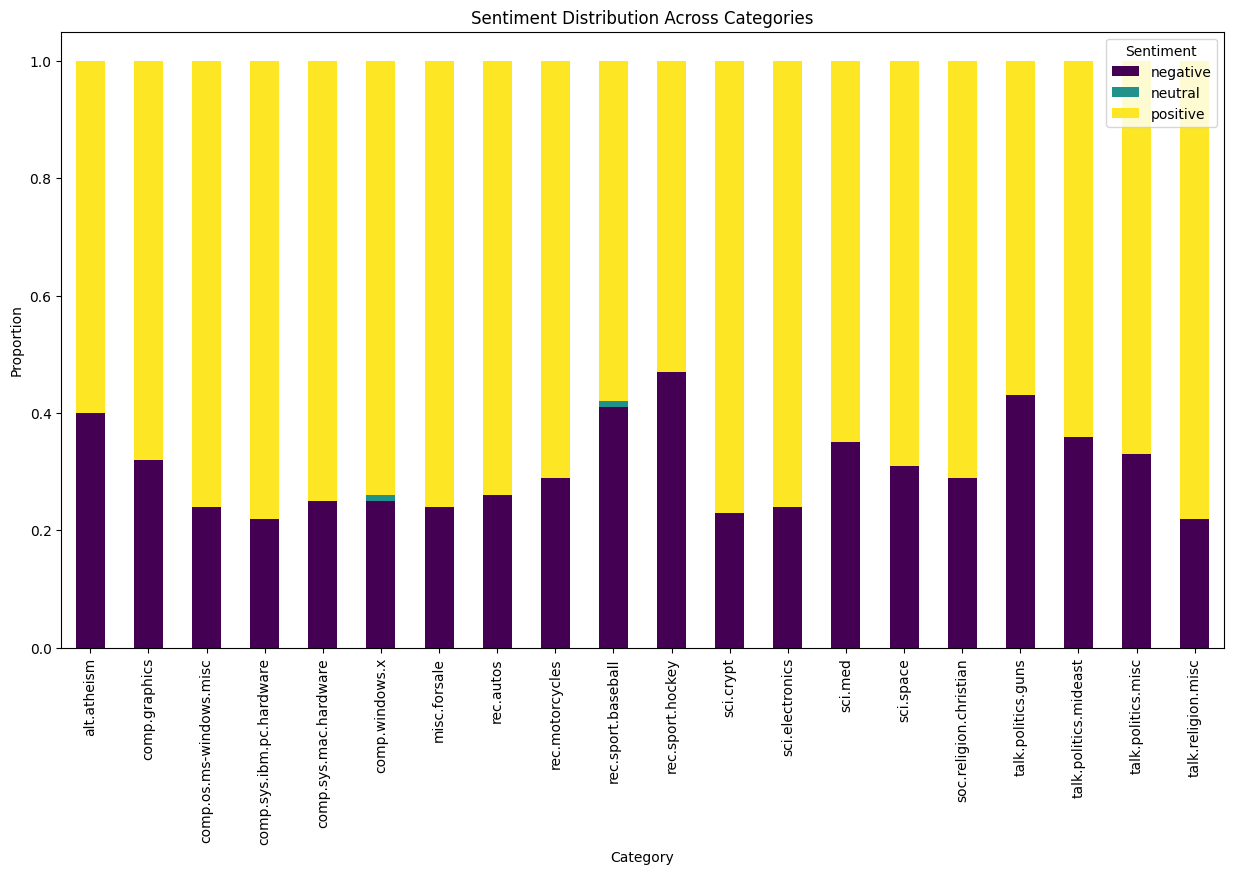

In [138]:
# Plot sentiment distribution across categories
sentiment_category.plot(kind='bar', stacked=True, figsize=(15, 8), colormap='viridis')
plt.title('Sentiment Distribution Across Categories')
plt.xlabel('Category')
plt.ylabel('Proportion')
plt.legend(title='Sentiment')
plt.show()

In [139]:
# Combine all text data into a single string for the word cloud
all_text = ' '.join(data['lemmatized_text'])

In [140]:
# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

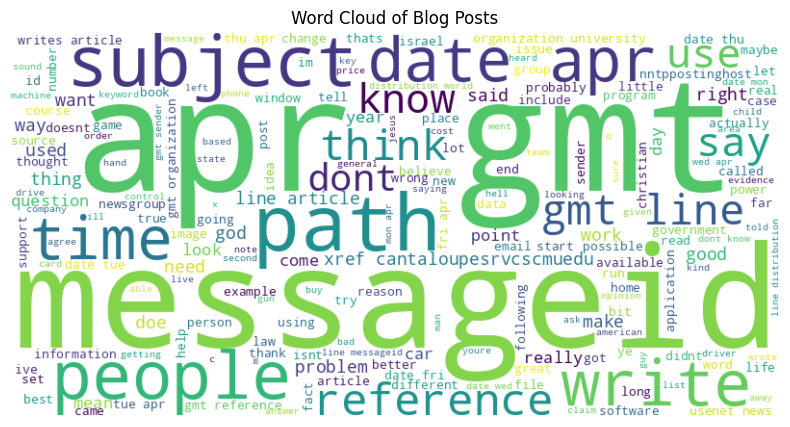

In [141]:
# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off axis
plt.title('Word Cloud of Blog Posts')
plt.show()

In [142]:
from collections import Counter

def plot_most_common_words(category, num_words=10):
    # Filter the dataframe for the selected category
    category_text = data[data['Labels'] == category]['lemmatized_text']

    # Combine all words into a single list
    all_words = ' '.join(category_text).split()

    # Check if there are enough words to process
    if len(all_words) == 0:
        print(f"No words found in the {category} category after preprocessing.")
        return

    # Count the most common words
    most_common_words = Counter(all_words).most_common(num_words)

    # Check if there are enough most common words
    if not most_common_words:
        print(f"Not enough data to display most common words for {category}.")
        return

    # Unzip the words and their counts for plotting
    words, counts = zip(*most_common_words)

    # Plot the most common words
    plt.figure(figsize=(10, 6))
    plt.bar(words, counts, color='purple')
    plt.title(f'Most Common Words in {category} Category')
    plt.xlabel('Words')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.show()

# Example: Plot most common words for a specific category
plot_most_common_words(category='graphics', num_words=15)


No words found in the graphics category after preprocessing.


In [143]:
data["Labels"].unique()

array(['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc',
       'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware',
       'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles',
       'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt',
       'sci.electronics', 'sci.med', 'sci.space',
       'soc.religion.christian', 'talk.politics.guns',
       'talk.politics.mideast', 'talk.politics.misc',
       'talk.religion.misc'], dtype=object)

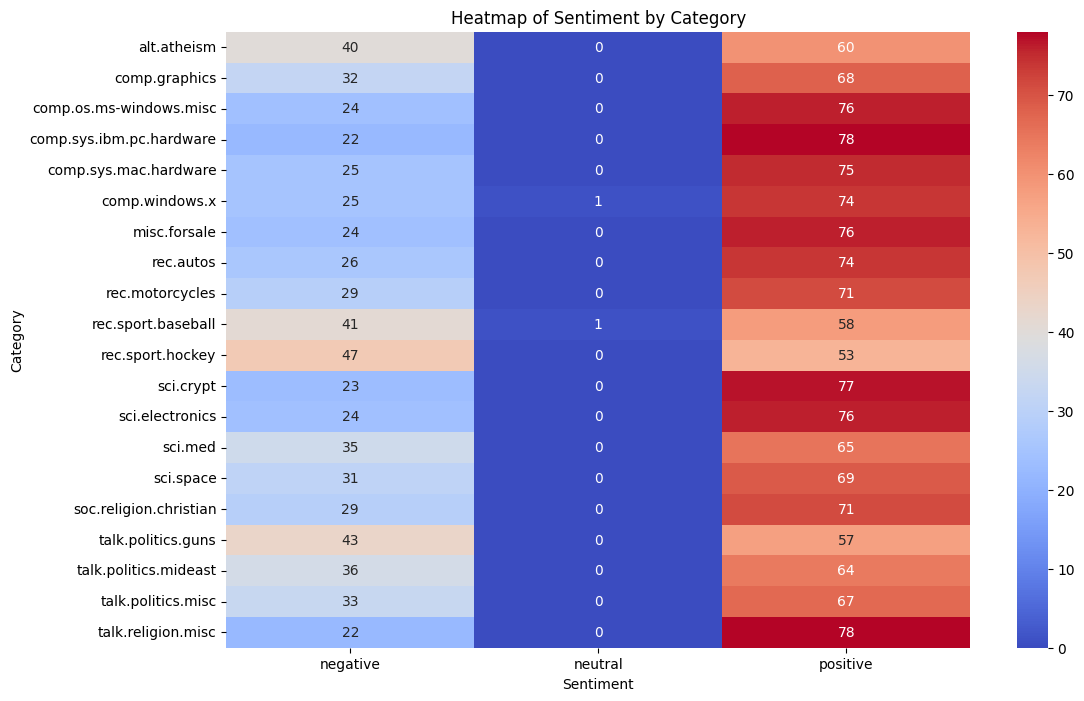

In [144]:
import seaborn as sns

# Create a pivot table for the heatmap
sentiment_category_pivot = data.pivot_table(index='Labels', columns='sentiment', aggfunc='size', fill_value=0)

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(sentiment_category_pivot, annot=True, fmt='d', cmap='coolwarm')
plt.title('Heatmap of Sentiment by Category')
plt.xlabel('Sentiment')
plt.ylabel('Category')
plt.show()


- categories with high Positive Sentiment
	- soc.religion.christian, talk.religion,misc.forsale have the highest positive sentiment words in it at > 80 % and because, we cant talk negative words or sentences in the domain of sales and religions

- categories with low positive sentiment
	- comp.sys.ibm.pc.hardware, sci.electronics, comp.os.ms-windows.misc have a negative sentiment of >75%



- Anlysis of the subject area
	- Computer and Technology (comp.graphics, comp.os.ms-windows.misc, comp.sys.ibm.pc.hardware, comp.sys.mac.hardware, comp.windows.x, sci.electronics): These categories generally show more balanced sentiment distribution, but with a tilt towards negativity.

	- Science and Technology (sci.crypt, sci.electronics, sci.med, sci.space): Here too, the sentiment is mixed, leaning slightly towards the positive in sci.med and sci.space

	-Recreation and Hobbies (rec.autos, rec.motorcycles, rec.sport.baseball, rec.sport.hockey): These categories generally have positive sentiments, especially in rec.sport.hockey.

	- Religion and Politics (soc.religion.christian, talk.politics.guns, talk.politics.mideast, talk.politics.misc, talk.religion.misc): This group exhibits extreme sentiments, with religion-related categories showing strong positivity and politics-related categories being more balanced or negative.

In [145]:
# Cross-validation
scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
print("\nCross-Validation Accuracy Scores:", scores)
print("Mean Cross-Validation Accuracy:", np.mean(scores))


Cross-Validation Accuracy Scores: [0.8    0.7975 0.7975 0.7925 0.7775]
Mean Cross-Validation Accuracy: 0.7929999999999999
